In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
X, y = make_moons(n_samples=1000, noise=0.25, random_state=42)
df = pd.DataFrame(X, columns=["x1", "x2"])
df["y"] = y

In [3]:
df.head()

,x1,x2,y
0,-0.141765,0.558236,1
1,1.197966,-0.303995,1
2,0.759391,0.110250,1
3,0.023315,-0.603563,1
4,-0.807980,0.548466,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1000 non-null   float64
 1   x2      1000 non-null   float64
 2   y       1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [5]:
df.describe()

,x1,x2,y
count,1000.000000,1000.000000,1000.00000
mean,0.496266,0.243301,0.50000
std,0.901882,0.549014,0.50025
min,-1.556552,-1.129576,0.00000
25%,-0.132968,-0.199042,0.00000
50%,0.509394,0.239193,0.50000
75%,1.110611,0.693493,1.00000
max,2.715678,1.608788,1.00000


In [6]:
df.shape

(1000, 3)

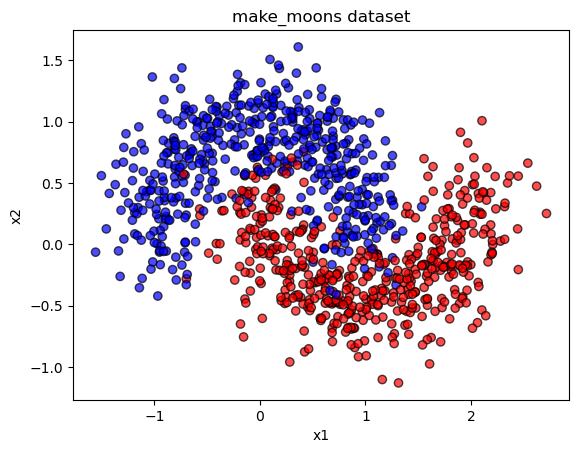

In [7]:
# Visualization
plt.scatter(df["x1"], df["x2"], c=df["y"], cmap="bwr", edgecolor="k", alpha=0.7)
plt.title("make_moons dataset")
plt.xlabel("x1"); plt.ylabel("x2")
plt.show()

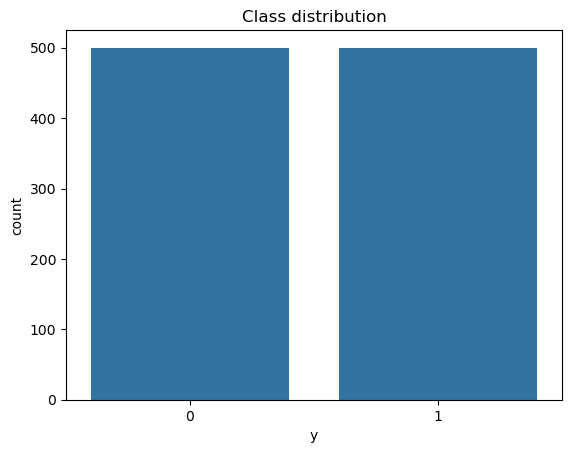

In [8]:
sns.countplot(x="y", data=df)
plt.title("Class distribution")
plt.show()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [12]:
def sigmoid_derivative(x):
    return x * (1 - x)

In [13]:
np.random.seed(42)

w11_1, w21_1 = np.random.randn(), np.random.randn()
w12_1, w22_1 = np.random.randn(), np.random.randn()
b11, b12 = np.random.randn(), np.random.randn()

w11_2, w21_2 = np.random.randn(), np.random.randn()
b21 = np.random.randn()

In [1]:
lr = 0.1
epochs = 2000

losses = []

for epoch in range(epochs):
    epoch_loss = 0
    for i in range(len(X_train)):
        x1, x2 = X_train[i]
        target = y_train[i]

        # Forward pass
        z11 = x1 * w11_1 + x2 * w21_1 + b11
        O11 = sigmoid(z11)

        z12 = x1 * w12_1 + x2 * w22_1 + b12
        O12 = sigmoid(z12)

        z21 = O11 * w11_2 + O12 * w21_2 + b21
        y_hat = sigmoid(z21)

        # Loss (MSE)
        L = 0.5 * (target - y_hat) ** 2
        epoch_loss += L

        # Backward pass
        dL_dyhat = -(target - y_hat)
        dyhat_dz21 = sigmoid_derivative(y_hat)

        dL_dw11_2 = dL_dyhat * dyhat_dz21 * O11
        dL_dw21_2 = dL_dyhat * dyhat_dz21 * O12
        dL_db21   = dL_dyhat * dyhat_dz21

        dL_dO11 = dL_dyhat * dyhat_dz21 * w11_2
        dL_dO12 = dL_dyhat * dyhat_dz21 * w21_2

        dO11_dz11 = sigmoid_derivative(O11)
        dL_dw11_1 = dL_dO11 * dO11_dz11 * x1
        dL_dw21_1 = dL_dO11 * dO11_dz11 * x2
        dL_db11   = dL_dO11 * dO11_dz11

        dO12_dz12 = sigmoid_derivative(O12)
        dL_dw12_1 = dL_dO12 * dO12_dz12 * x1
        dL_dw22_1 = dL_dO12 * dO12_dz12 * x2
        dL_db12   = dL_dO12 * dO12_dz12

        # Update weights
        w11_2 -= lr * dL_dw11_2
        w21_2 -= lr * dL_dw21_2
        b21   -= lr * dL_db21

        w11_1 -= lr * dL_dw11_1
        w21_1 -= lr * dL_dw21_1
        b11   -= lr * dL_db11

        w12_1 -= lr * dL_dw12_1
        w22_1 -= lr * dL_dw22_1
        b12   -= lr * dL_db12

    losses.append(epoch_loss / len(X_train))

    # Print weights & biases every 500 epochs
    if epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss={epoch_loss/len(X_train):.4f}")
        print(f"  w11_1={w11_1:.4f}, w21_1={w21_1:.4f}, b11={b11:.4f}")
        print(f"  w12_1={w12_1:.4f}, w22_1={w22_1:.4f}, b12={b12:.4f}")
        print(f"  w11_2={w11_2:.4f}, w21_2={w21_2:.4f}, b21={b21:.4f}\n")

NameError: name 'X_train' is not defined

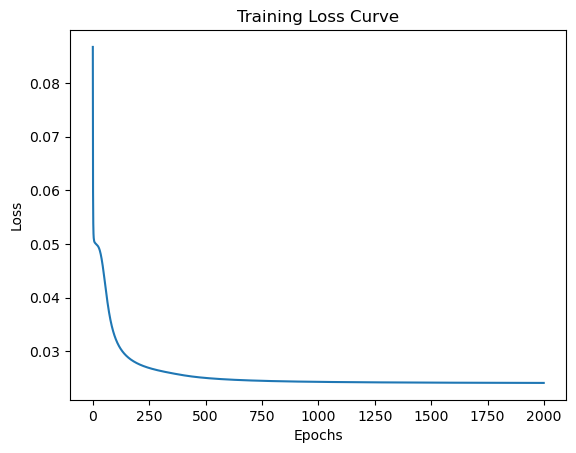

In [15]:
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()

In [16]:
xx, yy = np.meshgrid(
    np.linspace(X[:,0].min()-1, X[:,0].max()+1, 200),
    np.linspace(X[:,1].min()-1, X[:,1].max()+1, 200)
)
grid = np.c_[xx.ravel(), yy.ravel()]
grid_scaled = scaler.transform(grid)

In [17]:
Z = []
for g in grid_scaled:
    x1, x2 = g
    O11 = sigmoid(x1 * w11_1 + x2 * w21_1 + b11)
    O12 = sigmoid(x1 * w12_1 + x2 * w22_1 + b12)
    y_hat = sigmoid(O11 * w11_2 + O12 * w21_2 + b21)
    Z.append(y_hat)

Z = np.array(Z).reshape(xx.shape)

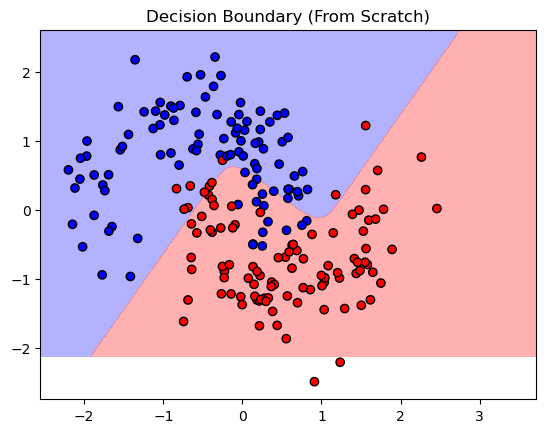

In [18]:
plt.contourf(xx, yy, Z, levels=[0,0.5,1], alpha=0.6, cmap="bwr")
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, edgecolor="k", cmap="bwr")
plt.title("Decision Boundary (From Scratch)")
plt.show()